# Insurance Claims- Fraud Detection<br>
## Problem Statement:<br>
## Business case:<br>
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.<br>

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. <br>

In this example, we will be working with some auto insurance data to demonstrate how I can create a predictive model that predicts if an insurance claim is fraudulent or not. <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


There are 1000 rows and 40 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.select_dtypes(include='int64').columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

In [6]:
df.select_dtypes(include='float64').columns

Index(['policy_annual_premium', '_c39'], dtype='object')

In [7]:
df.select_dtypes(include='object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

There are Null values in the dataset specified as '?'. Column _c39 has all null values.

# EDA AND PREPROCESSING

## EDA

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

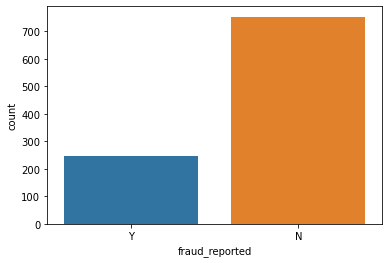

In [9]:
sns.countplot(df['fraud_reported'])

There are 247 yes and 753 no entries.

In [10]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

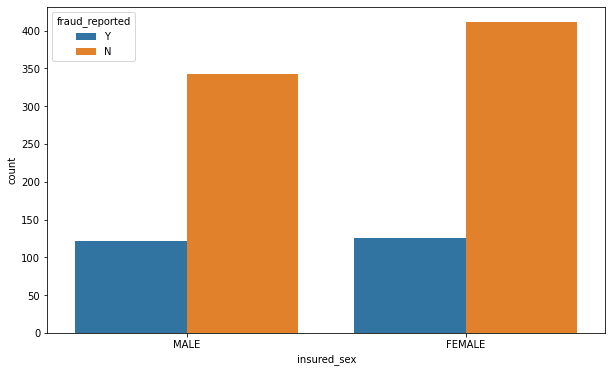

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df['insured_sex'], hue=df['fraud_reported'])

There are more number of females, however, same amount of two classes who insured the vehicle.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

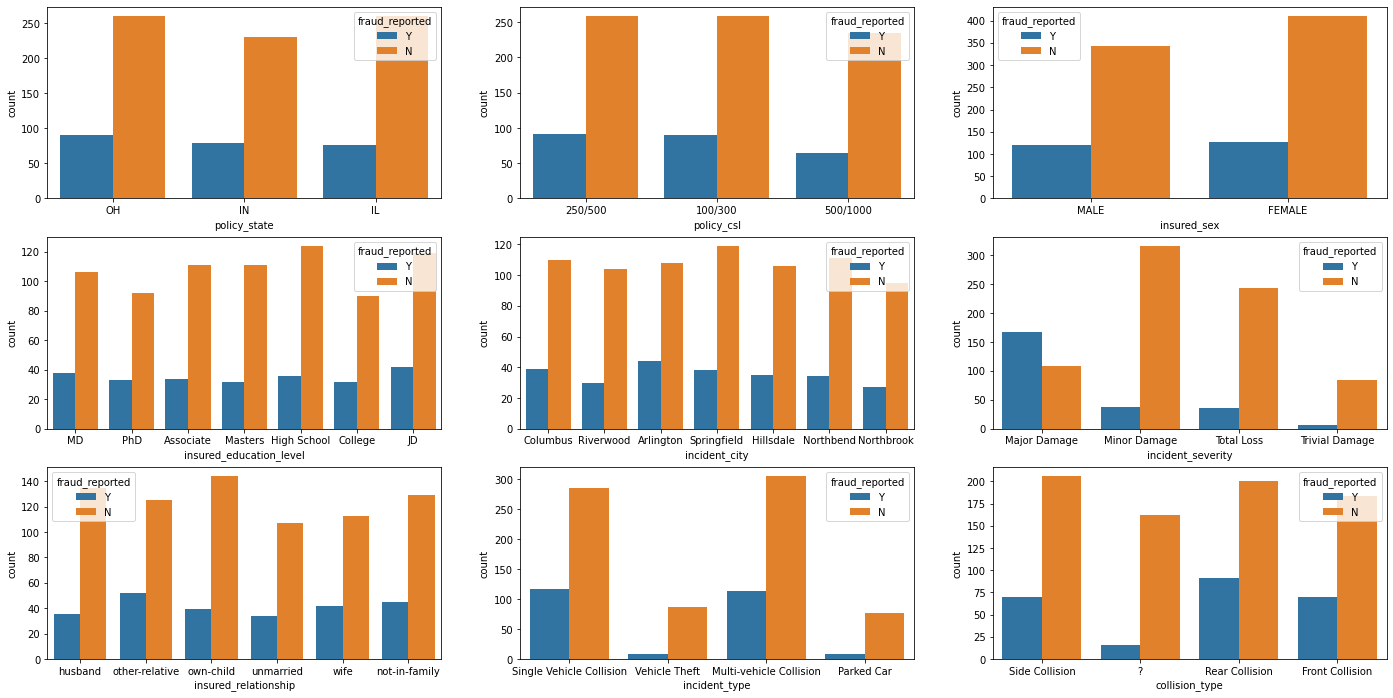

In [12]:
figure, axes = plt.subplots(3,3, figsize=(24,12))
sns.countplot(ax=axes[0,0], data=df, hue= 'fraud_reported', x= 'policy_state')
sns.countplot(ax=axes[0,1], data=df, hue= 'fraud_reported', x= 'policy_csl')
sns.countplot(ax=axes[0,2], data=df, hue= 'fraud_reported', x= 'insured_sex')
sns.countplot(ax=axes[1,0], data=df, hue= 'fraud_reported', x= 'insured_education_level')
sns.countplot(ax=axes[1,1], data=df, hue= 'fraud_reported', x= 'incident_city')
sns.countplot(ax=axes[1,2], data=df, hue= 'fraud_reported', x= 'incident_severity')
sns.countplot(ax=axes[2,0], data=df, hue= 'fraud_reported', x= 'insured_relationship')
sns.countplot(ax=axes[2,1], data=df, hue= 'fraud_reported', x= 'incident_type')
sns.countplot(ax=axes[2,2], data=df, hue= 'fraud_reported', x= 'collision_type')

**Looking at the plot**:<br>
1) OH Policy_state has more number of insurance and slighly more fraud reported numbers.<br>
2) There are same number of three categories in policy_csl.<br>
3) insured_relationship and insured_education_level has same amount of frauds reported.<br>
4) Same goes with incident_city.<br>
5) Customers claimed to have Major_damage in inciden_severity has more frauds reported.<br>
6) In incident_typr Single_vehicle and Multi-vehicle collision categiry has more frauds reported.<br>
7) There are null values in the column collision_type. Rear_collision has more frauds reported.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

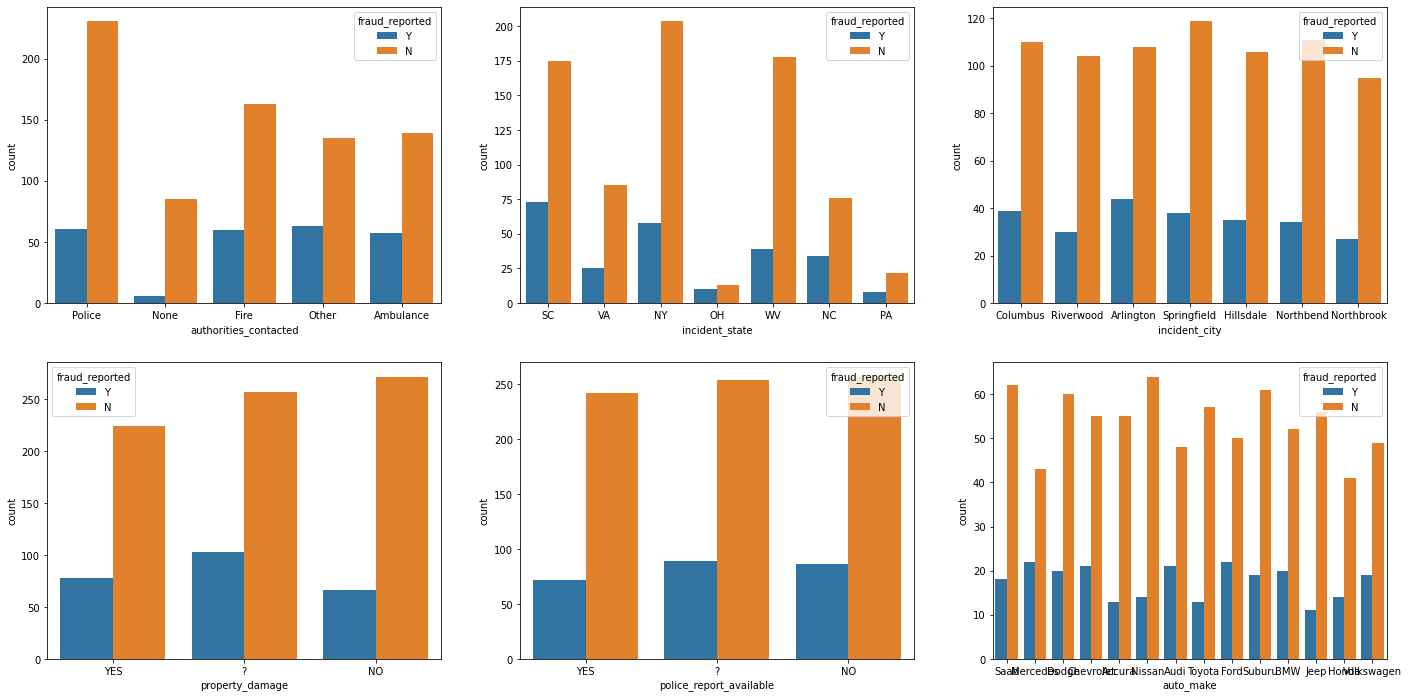

In [13]:
figure, axes = plt.subplots(2,3, figsize=(24,12))
sns.countplot(ax=axes[0,0], data=df, hue= 'fraud_reported', x= 'authorities_contacted')
sns.countplot(ax=axes[0,1], data=df, hue= 'fraud_reported', x= 'incident_state')
sns.countplot(ax=axes[0,2], data=df, hue= 'fraud_reported', x= 'incident_city')
sns.countplot(ax=axes[1,0], data=df, hue= 'fraud_reported', x= 'property_damage')
sns.countplot(ax=axes[1,1], data=df, hue= 'fraud_reported', x= 'police_report_available')
sns.countplot(ax=axes[1,2], data=df, hue= 'fraud_reported', x= 'auto_make')

**Observations:**<br>
1) authorities_contacted all the categories have equal amount of frauds detected, however, Police has been concated more.<br>
2) SC, NY and WV has more incidents reported.<br>
3) incident_city, property_damage, police_report_available and auto_make have comparetively equal number of frauds reported.<br>
4) police_report_available and propert_damage has missing values as "?".

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

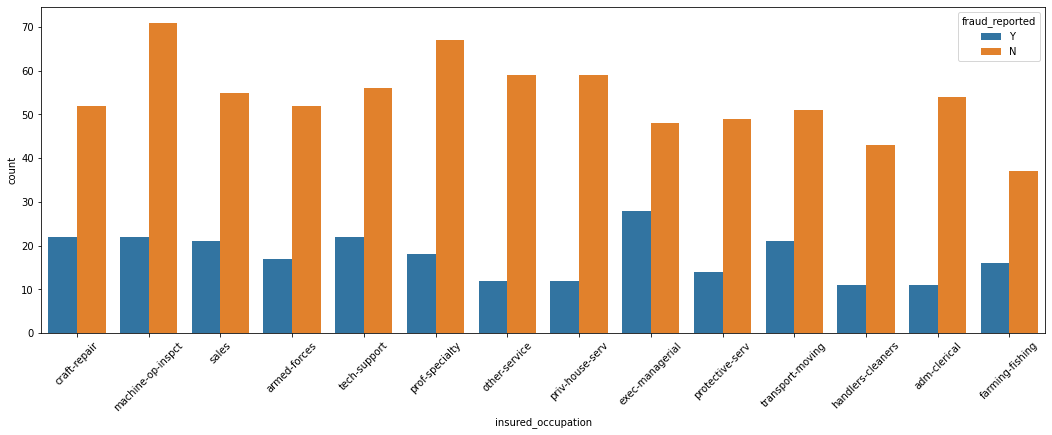

In [14]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['insured_occupation'], hue=df['fraud_reported'])

exec-managerial has more customers reported as fraud.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

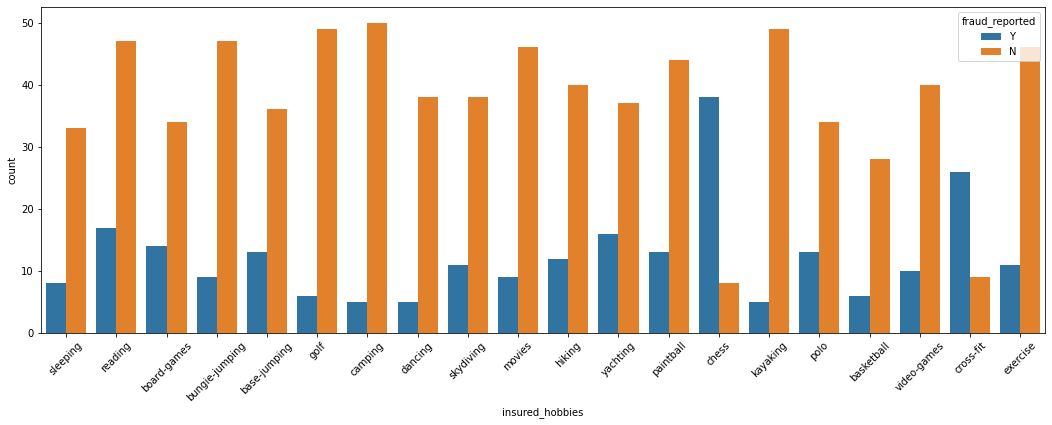

In [15]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'])

Customer with chess hobbies has significantly more frauds detected. "kayaking" has very less frauds detected.

<AxesSubplot:xlabel='auto_model', ylabel='count'>

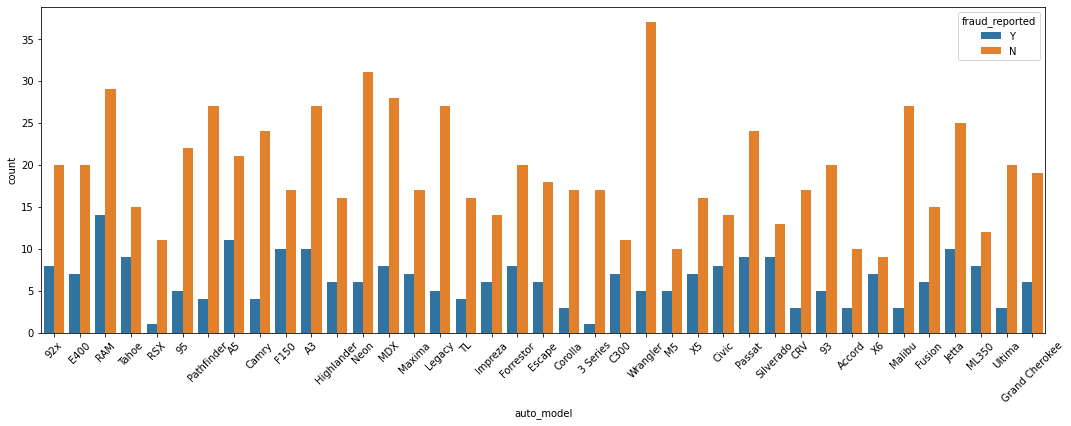

In [16]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['auto_model'], hue=df['fraud_reported'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

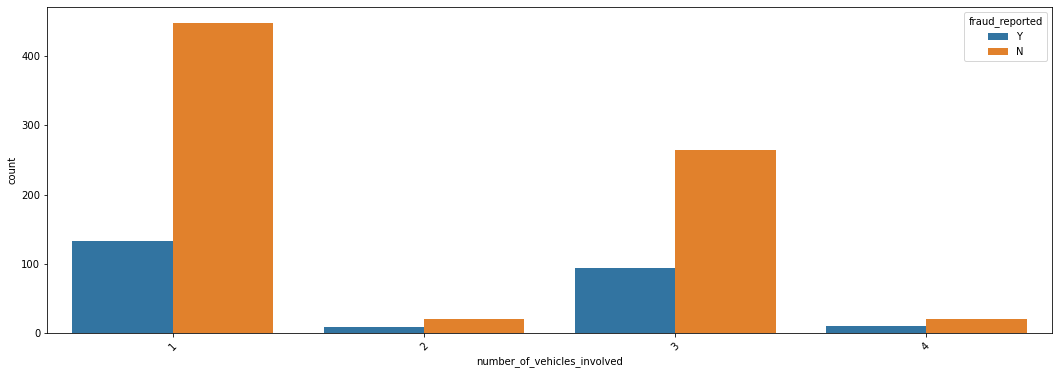

In [17]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['number_of_vehicles_involved'], hue=df['fraud_reported'])

number_of_vehicles_involved with 1 has more fraud detected entries.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

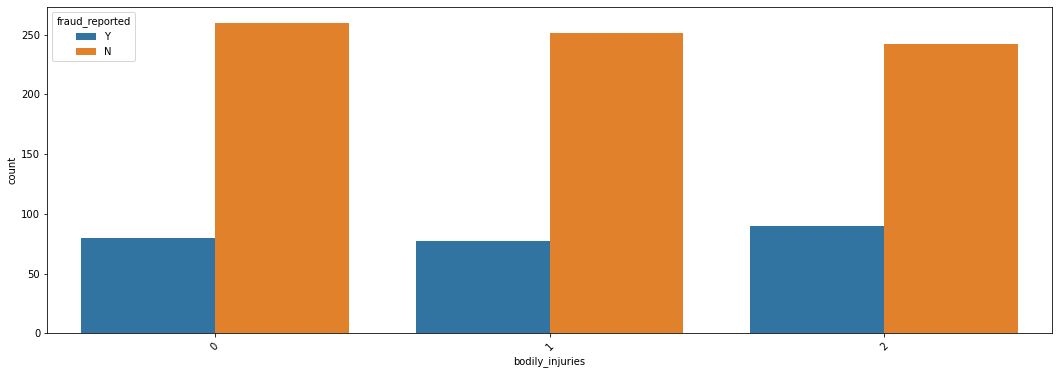

In [18]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['bodily_injuries'], hue=df['fraud_reported'])

ALl the categories in bodily_injuries has same amount of fraud detected, however, the number of entries in each category differ slightly.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

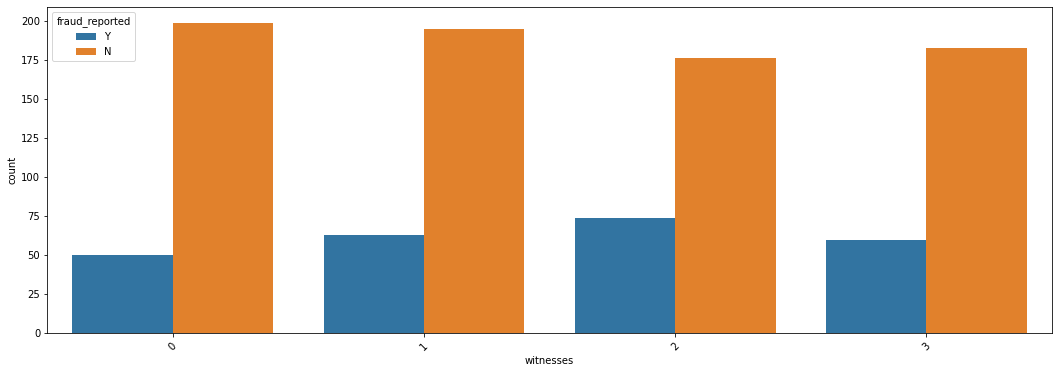

In [19]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['witnesses'], hue=df['fraud_reported'])

Same with this column

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

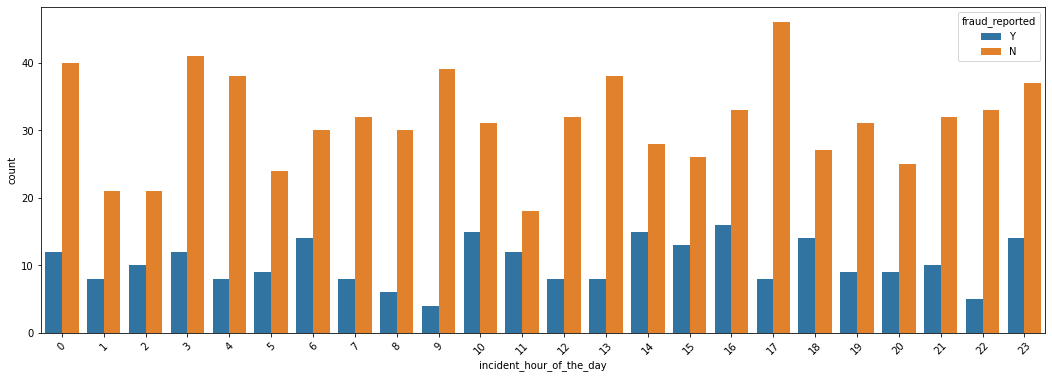

In [20]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['incident_hour_of_the_day'], hue=df['fraud_reported'])

The the accident from 7-9 seems to be more geuine comparetively. We will try to divide them in to categories in terms of part of the day. 

<AxesSubplot:xlabel='auto_year', ylabel='count'>

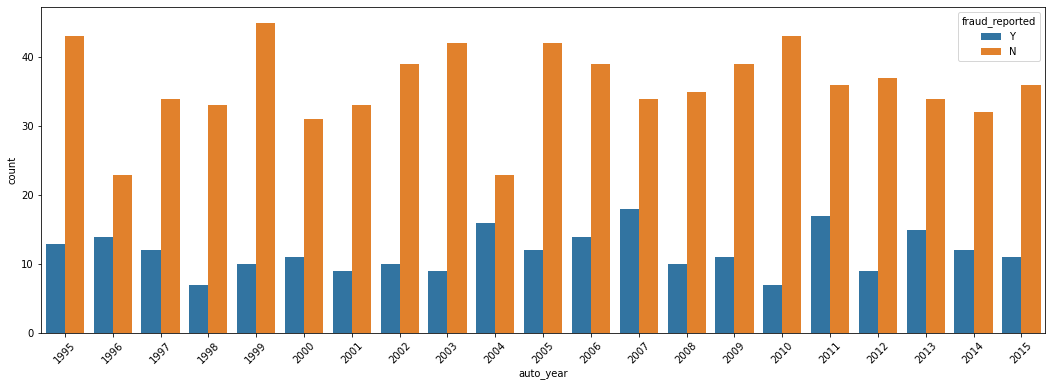

In [21]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['auto_year'], hue=df['fraud_reported'])

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

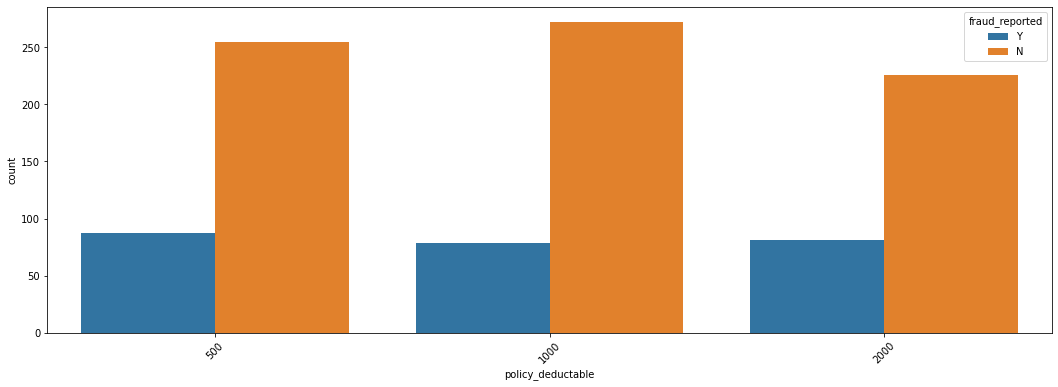

In [22]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['policy_deductable'], hue=df['fraud_reported'])

we will make sure to retrieve the age of the vehicles.

In [26]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## PREPROCESSING

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.<br>
So let's make two new columns that give us per person and per accident results.

In [27]:
#This code will add two columns we require.
df['csl_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [28]:
df['csl_person'].unique()

array(['250', '100', '500'], dtype=object)

In [29]:
df['csl_accident'].unique()

array(['500', '300', '1000'], dtype=object)

These are categorical values, I can consider them as ordinal data.

auto_year columns has year of manufacture of the vehicle. We will transform this column to the total age of the vehicle.

In [30]:
df['vehicle_age'] = 2021 - df['auto_year'] 

In [31]:
df['vehicle_age'].value_counts()

26    56
22    55
16    54
15    53
10    53
14    52
18    51
11    50
12    50
8     49
19    49
6     47
24    46
9     46
13    45
7     44
20    42
21    42
23    40
17    39
25    37
Name: vehicle_age, dtype: int64

In [32]:
late_night = [1,2,3,4]
early_mor = [5,6,7,8]
morning = [9,10, 11, 12]
afternoon = [13, 14, 15, 16]
evening = [17,18, 19, 20]
night = [21, 22, 23, 0]

In [33]:
def partofday(int):
    if int in late_night:
        return 'late_night'
    elif int in early_mor:
        return 'early_mor'
    elif int in morning:
        return 'morning'
    elif int in afternoon:
        return 'afternoon'
    elif int in evening:
        return 'evening'
    elif int in night:
        return 'night'

In [34]:
df['hours'] = df['incident_hour_of_the_day'].apply(partofday)

In [35]:
df['hours'].unique()

array(['early_mor', 'evening', 'night', 'afternoon', 'morning',
       'late_night'], dtype=object)

we have converted int64 column to object type.

In [36]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [37]:
def edu(string):
    if 'PhD' in string:
        return 6
    elif 'MD' in string:
        return 5
    elif 'JD' in string:
        return 4
    elif 'Masters' in string:
        return 3
    elif 'Associate' in string:
        return 2
    elif 'College' in string:
        return 1
    elif 'High School' in string:
        return 0

In [38]:
df['education'] = df['insured_education_level'].apply(edu)

In [39]:
df['education'].value_counts()

4    161
0    160
2    145
5    144
3    143
6    125
1    122
Name: education, dtype: int64

We have now converted education column into ordinal column as there is sense of order to this feature. Now we will drop the fetaures that aren't helpful for model creation.

In [40]:
df.drop(['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date',
         'incident_location', '_c39', 'auto_year', 'incident_hour_of_the_day','insured_education_level'], axis=1, inplace=True)

We have now dropped the features.

**We have missing values in collision_type, property_damage and police_report_available columns with value '?'**

In [41]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [42]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [43]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

As Property Damage and Police Report are normally yes or no we will assume that the missing values(i.e.. "?") are NO.

In [44]:
df['property_damage'].replace(to_replace='?',value='NO', inplace=True)
df['police_report_available'].replace(to_replace='?',value='NO', inplace=True)

In [45]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [46]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

We will now consider missing value in Collision Type column as a seperate category.

In [47]:
df['collision_type'].replace(to_replace='?',value='different collision', inplace=True)

## ENCODING

In [48]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [49]:
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

df['insured_sex'] = le.fit_transform(df['insured_sex'])

df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['policy_deductable'] = le.fit_transform(df['policy_deductable'])
df['umbrella_limit'] = le.fit_transform(df['umbrella_limit'])

In [50]:
df['csl_person'] = le.fit_transform(df['csl_person'])
df['csl_accident'] = le.fit_transform(df['csl_accident'])

1) Converted insured_sex, police_report_available, property_damage and fraud_reported(target variable) into binary variables.<br>
2) Included insured_sex, property_damage and police_report_available as the features has only 2 categories.<br>
3) Converted csl_person and csl_accident using label enocoding assuming the values has a ordinal trend.

<AxesSubplot:>

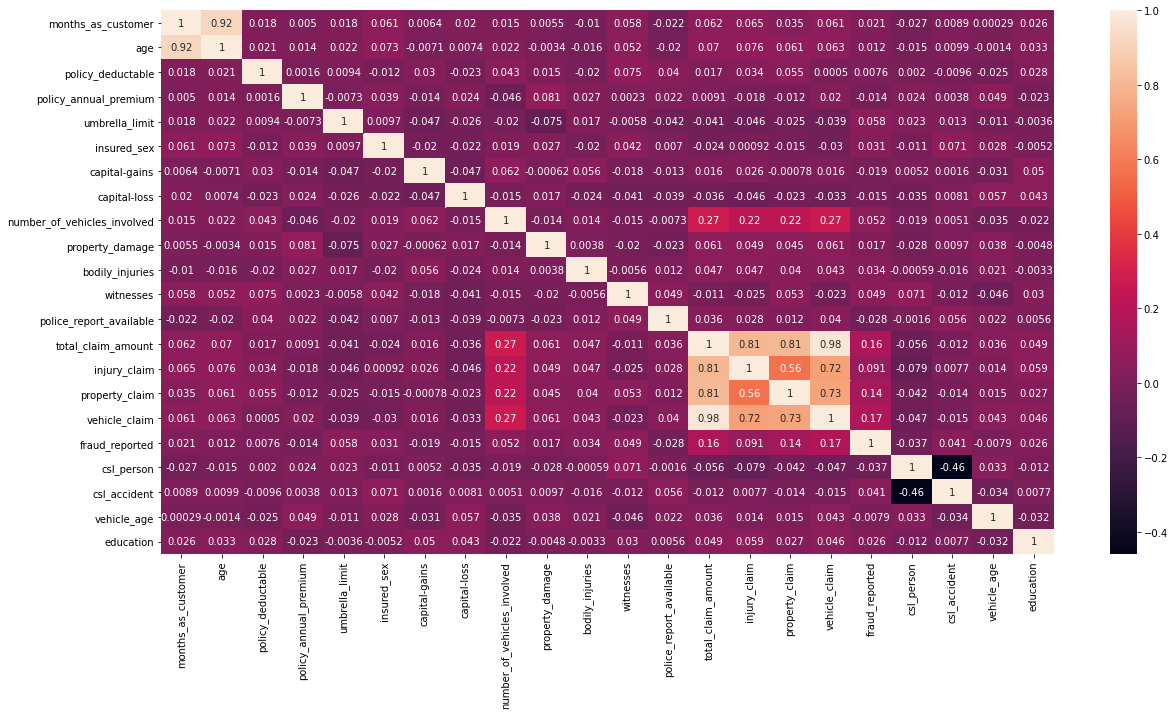

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [52]:
def correlation(dataset, thresold):
    correlated_cols = set()# set of all names of correlated columns
    correlation_matrix = dataset.corr()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > thresold:
                column_name = correlation_matrix.columns[i]   #Absolute correlation values
                correlated_cols.add(column_name)       #Name of the column which is highly correlated
    return correlated_cols

In [53]:
more_corr = correlation(df, 0.90)

In [54]:
more_corr

{'age', 'vehicle_claim'}

1) months_as_customer and age are highly correlated with each other and one of them can be processed as duplicate.<br>
2) total_claim_amount and vehicle_claim are highly correlated with each other.<br>
-- we will drop any 2 of the above 4 columns (1 from the two mutually high correlated columns) as this would decrease the dimensions of the data set and also remove duplicacy of columns which will help improve ML accuracy.

In [55]:
df.drop(['age', 'vehicle_claim'], axis=1, inplace=True)

In [56]:
df.drop(['vehicle_age'], axis=1, inplace=True)

Dropped vehicle age as the correlation is very less so we have dropped this column

## Encoding unsing get_dummies

In [57]:
dummies = pd.get_dummies(df[['policy_state','incident_city','incident_severity','insured_relationship',
 'incident_type','collision_type','authorities_contacted','incident_state','incident_city','property_damage',
 'auto_make','insured_occupation','insured_hobbies',
 'auto_model','hours']],drop_first=True)

In [58]:
df.drop(['policy_state','incident_city','incident_severity','insured_relationship',
 'incident_type','collision_type','authorities_contacted','incident_state','incident_city','property_damage',
 'auto_make','insured_occupation','insured_hobbies',
 'auto_model','hours'],axis=1,inplace=True)

In [59]:
dummies

,property_damage,policy_state_IN,policy_state_OH,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_severity_Minor Damage,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,hours_early_mor,hours_evening,hours_late_night,hours_morning,hours_night
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
merged = pd.concat([df,dummies], axis='columns')

In [61]:
merged

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,hours_early_mor,hours_evening,hours_late_night,hours_morning,hours_night
0,328,1,1406.91,1,1,53300,0,1,1,2,...,0,0,0,0,0,1,0,0,0,0
1,228,2,1197.22,5,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,134,2,1413.14,5,0,35100,0,3,2,3,...,0,0,0,0,0,1,0,0,0,0
3,256,2,1415.74,6,0,48900,-62400,1,1,2,...,1,0,0,0,0,1,0,0,0,0
4,228,1,1583.91,6,1,66000,-46000,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,1310.80,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
996,285,1,1436.79,1,0,70900,0,1,2,3,...,0,0,0,0,0,0,0,0,0,1
997,130,0,1383.49,3,0,35100,0,3,2,3,...,0,0,0,0,0,0,0,1,0,0
998,458,2,1356.92,5,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df = merged

# SKEWNESS AND OUTLIERS.


In [63]:
df.skew()

months_as_customer       0.362177
policy_deductable        0.063505
policy_annual_premium    0.004402
umbrella_limit           1.936066
insured_sex              0.148630
                           ...   
hours_early_mor          1.930742
hours_evening            1.769157
hours_late_night         1.867841
hours_morning            1.867841
hours_night              1.642120
Length: 145, dtype: float64

In [64]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

## Column months_as_customer

In [65]:
df['months_as_customer'].describe()

count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

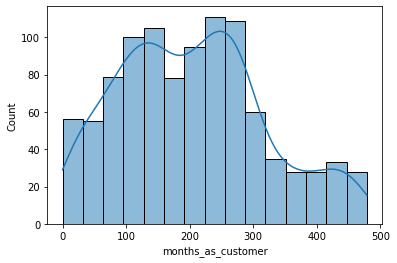

In [66]:
sns.histplot(df['months_as_customer'], kde=True)

<AxesSubplot:xlabel='months_as_customer'>

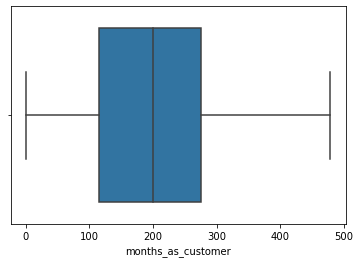

In [67]:
sns.boxplot(df['months_as_customer'])

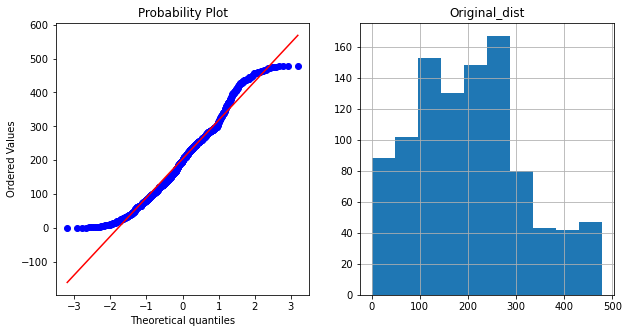

In [68]:
original_dist(df,'months_as_customer')

In [69]:
df['months_as_customer'].skew()

0.3621768477780205

All good with this column.

## Column capital-gains

In [70]:
df['capital-gains'].describe()

count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

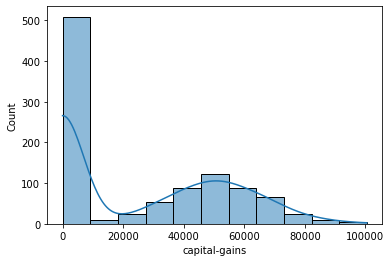

In [71]:
sns.histplot(df['capital-gains'], kde=True)

<AxesSubplot:xlabel='capital-gains'>

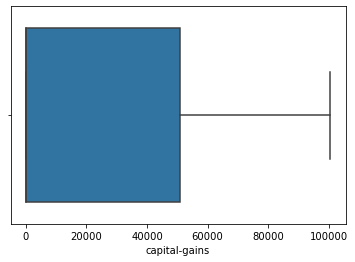

In [72]:
sns.boxplot(df['capital-gains'])

In [73]:
df['capital-gains'].skew()

0.4788502295807907

All good with this column.

## Column capital-loss

In [74]:
df['capital-loss'].describe()

count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

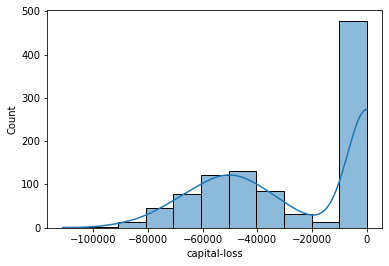

In [75]:
sns.histplot(df['capital-loss'], kde=True)

<AxesSubplot:xlabel='capital-loss'>

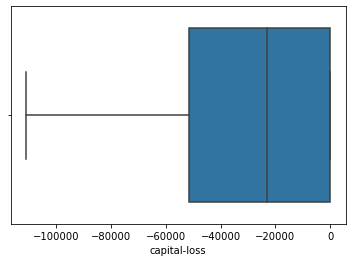

In [76]:
sns.boxplot(df['capital-loss'])

In [77]:
df['capital-loss'].skew()

-0.39147194299389343

All good with this column.

## Column total_claim_amount

In [79]:
df['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

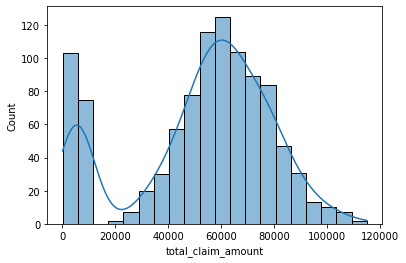

In [80]:
sns.histplot(df['total_claim_amount'], kde=True)

<AxesSubplot:xlabel='total_claim_amount'>

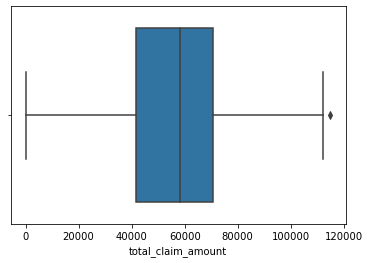

In [81]:
sns.boxplot(df['total_claim_amount'])

Only one outliers, that okay as it is close to the whisker.

In [82]:
df['total_claim_amount'].skew()

-0.594581988510234

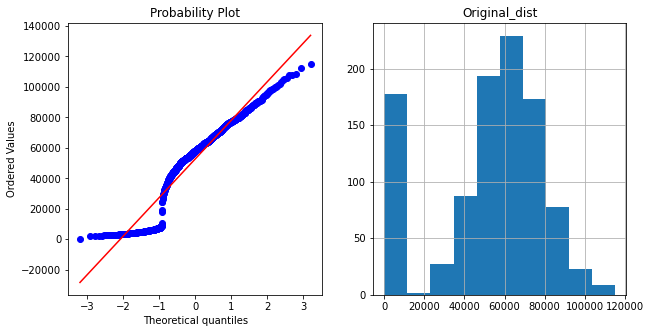

In [83]:
original_dist(df,'total_claim_amount')

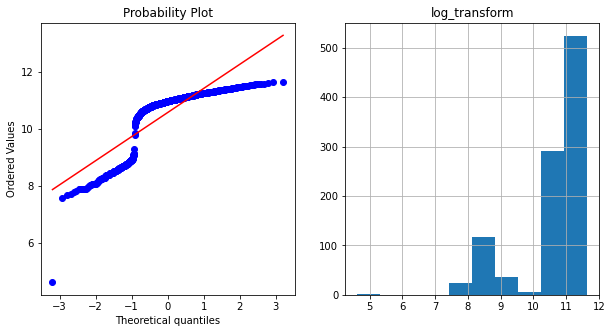

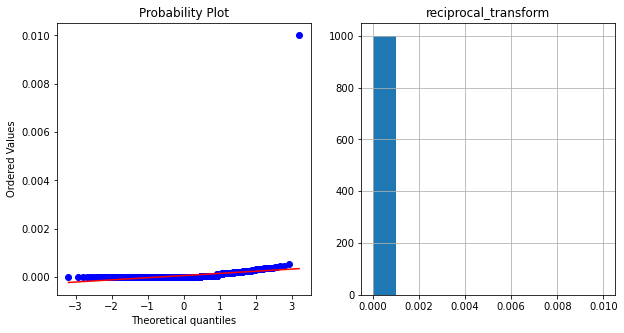

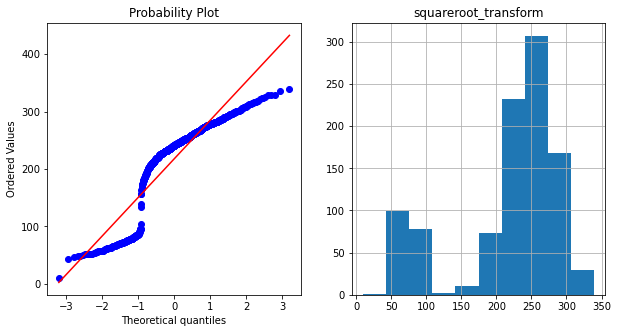

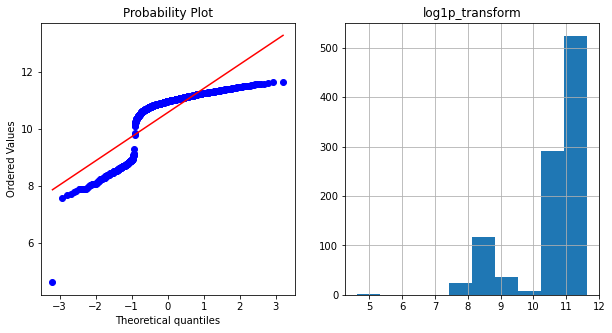

In [85]:
log_transform(df,'total_claim_amount')

reciprocal_transform(df,'total_claim_amount')

squareroot_transform(df,'total_claim_amount')

log1p_transform(df,'total_claim_amount')

In [88]:
(np.log1p(df['total_claim_amount'])).skew()

-1.6605098039725132

Unable to reduce the skewness more than -0.59 we will move forward.

## Column injury_claim

In [89]:
df['injury_claim'].describe()

count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
25%       4295.000000
50%       6775.000000
75%      11305.000000
max      21450.000000
Name: injury_claim, dtype: float64

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

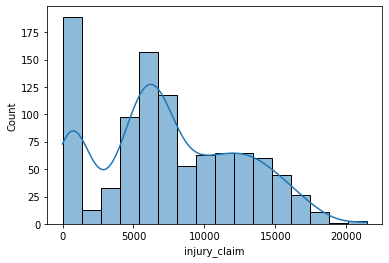

In [90]:
sns.histplot(df['injury_claim'], kde=True)

<AxesSubplot:xlabel='injury_claim'>

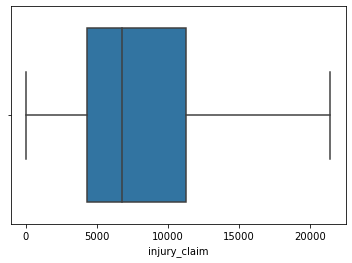

In [91]:
sns.boxplot(df['injury_claim'])

In [92]:
df['injury_claim'].skew()

0.26481087847181833

All good with this column.

## Column property_claim

In [93]:
df['property_claim'].describe()

count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
25%       4445.000000
50%       6750.000000
75%      10885.000000
max      23670.000000
Name: property_claim, dtype: float64

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

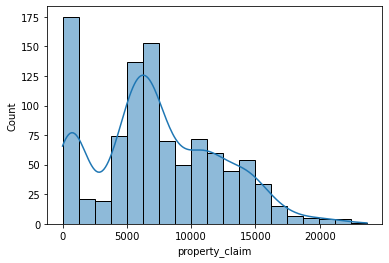

In [94]:
sns.histplot(df['property_claim'], kde=True)

<AxesSubplot:xlabel='property_claim'>

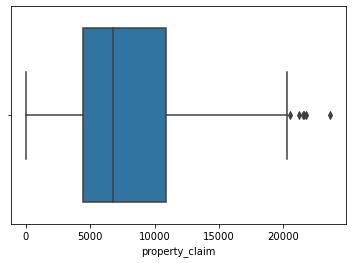

In [95]:
sns.boxplot(df['property_claim'])

In [98]:
outlier_IQR(df,'property_claim')

(-5215.0, 20545.0)

In [99]:
df[df['property_claim']>20545.0].shape

(6, 145)

In [100]:
df = df[df['property_claim']<=20545.0]

Removed 6 outlier entries.

In [101]:
df['property_claim'].skew()

0.29117076136280573

All good with this column.

# DEALING WITH DATA IMBALANCE PROBLEM.


In [102]:
df['fraud_reported'].value_counts()

0    749
1    245
Name: fraud_reported, dtype: int64

**1 - YES and 0 - NO**

In [103]:
x = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

## Method1:  UnderSampling.


In [104]:
fr_yes = df[df['fraud_reported']==1]
fr_no = df[df['fraud_reported']==0]

In [105]:
fr_yes.shape

(245, 145)

In [106]:
fr_no.shape

(749, 145)

We would need 245 entries from two categories.

In [107]:
Under_sample = fr_no.sample(245)

In [108]:
test_under = pd.concat([Under_sample, fr_yes], axis=0)

In [109]:
test_under['fraud_reported'].value_counts()

1    245
0    245
Name: fraud_reported, dtype: int64

We have created a new DataFrame with same amount of two classes for this data.

In [111]:
x1 = test_under.drop('fraud_reported', axis=1)
y1 = test_under['fraud_reported']

## Finding the best random state for the model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8673469387755102 on random state 35


We got a good accuracy of 86.73% at random state 35. Let's test models.

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=35)

## Testing models

In [114]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6224489795918368
[[32 22]
 [15 29]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        54
           1       0.57      0.66      0.61        44

    accuracy                           0.62        98
   macro avg       0.62      0.63      0.62        98
weighted avg       0.63      0.62      0.62        98



In [115]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8367346938775511
[[44 10]
 [ 6 38]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.79      0.86      0.83        44

    accuracy                           0.84        98
   macro avg       0.84      0.84      0.84        98
weighted avg       0.84      0.84      0.84        98



In [116]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8469387755102041
[[44 10]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        54
           1       0.80      0.89      0.84        44

    accuracy                           0.85        98
   macro avg       0.85      0.85      0.85        98
weighted avg       0.85      0.85      0.85        98



In [117]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8469387755102041
[[44 10]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        54
           1       0.80      0.89      0.84        44

    accuracy                           0.85        98
   macro avg       0.85      0.85      0.85        98
weighted avg       0.85      0.85      0.85        98



In [118]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5612244897959183
[[29 25]
 [18 26]]
              precision    recall  f1-score   support

           0       0.62      0.54      0.57        54
           1       0.51      0.59      0.55        44

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.57      0.56      0.56        98



In [119]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6020408163265306
[[17 37]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.89      0.31      0.47        54
           1       0.53      0.95      0.68        44

    accuracy                           0.60        98
   macro avg       0.71      0.63      0.57        98
weighted avg       0.73      0.60      0.56        98



In [120]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8979591836734694
[[47  7]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        54
           1       0.85      0.93      0.89        44

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98



Gradient Boosting Classifier performed well. However, Let's crossvalidate.

# Crossvalidation

In [121]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.7776813359727932


In [122]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.796817420435511


In [123]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.6921679102583626


In [124]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.7515151515151516


In [125]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.7776813359727932


In [126]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.7776813359727932


Looking at the values we will consider gradient boosting algorithm for model building

## Hyperparameter Tuning

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['friedman_mse', 'mse','mae'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150], 'loss':['deviance','exponential'] }

In [129]:
RCV = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [130]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 10,
 'max_features': 'auto',
 'max_depth': 5,
 'loss': 'exponential',
 'criterion': 'mse'}

## Final Model

In [131]:
model1 = GradientBoostingClassifier(n_estimators=10, max_features= 'auto', max_depth= 5, criterion= 'mse',
                                    loss='exponential', random_state=35)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

94.89795918367348
[[50  4]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.91      0.98      0.95        44

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



We got an accuracy of 94.90%, this is a very good accuracy, however, we will try other methods as well.

## Method 2: OverSampling

In [132]:
over_sample = fr_yes.sample(749, replace=True)

In [133]:
over_sample.shape

(749, 145)

In [134]:
fr_no.shape

(749, 145)

In [135]:
test_over = pd.concat([fr_no, over_sample], axis=0)

In [136]:
test_over['fraud_reported'].value_counts()

1    749
0    749
Name: fraud_reported, dtype: int64

In [137]:
x2 = test_over.drop('fraud_reported', axis=1)
y2 = test_over['fraud_reported']

## Finding the best random state for the model

In [140]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i

print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9466666666666667 on random state 170


This technique also give very good accuracy of 94.67%, Let's train models 

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=170)

## Testing models

In [142]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5633333333333334
[[83 71]
 [60 86]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       154
           1       0.55      0.59      0.57       146

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300



In [143]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.92
[[130  24]
 [  0 146]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       154
           1       0.86      1.00      0.92       146

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [144]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.95
[[140  14]
 [  1 145]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       154
           1       0.91      0.99      0.95       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [145]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.84
[[133  21]
 [ 27 119]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       154
           1       0.85      0.82      0.83       146

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [146]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6733333333333333
[[ 83  71]
 [ 27 119]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       154
           1       0.63      0.82      0.71       146

    accuracy                           0.67       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.67      0.67       300



In [147]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6133333333333333
[[ 54 100]
 [ 16 130]]
              precision    recall  f1-score   support

           0       0.77      0.35      0.48       154
           1       0.57      0.89      0.69       146

    accuracy                           0.61       300
   macro avg       0.67      0.62      0.59       300
weighted avg       0.67      0.61      0.58       300



In [148]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8933333333333333
[[131  23]
 [  9 137]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       154
           1       0.86      0.94      0.90       146

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



Random forest performed well. However, Let's crossvalidate.

# Crossvalidation

In [149]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.7686107304197757


In [150]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7978072179077205


In [151]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.6921679102583626


In [152]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.7515151515151516


In [153]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.7686107304197757


In [154]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.7686107304197757


Looking at the values Random forest has more promising results. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [157]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [158]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'entropy'}

## Final Model

In [159]:
model2 = RandomForestClassifier(n_estimators=150, max_features= 'auto', max_depth= 7, criterion= 'entropy', random_state=170)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

88.33333333333333
[[130  24]
 [ 11 135]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       154
           1       0.85      0.92      0.89       146

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



We got a low accuracy then UnderSampling. Let's move with SMOTE.

# Method 3: SMOTE

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
y.value_counts()

0    749
1    245
Name: fraud_reported, dtype: int64

In [163]:
X=np.array(x)

In [169]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(X,y)

In [170]:
y_sm.value_counts()

1    749
0    749
Name: fraud_reported, dtype: int64

## Finding the best random state for the model

In [171]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.6733333333333333 on random state 76


# CONCLUSION.

We got a very low accuracy with SMOTE. We will use the undersampling as the best technique and save the model for submission.

# SAVING THE BEST MODEL FOR SUBMISSION.

Out of model1 and model2, model1 would be our model for submission with an accuracy of 94.90%.

In [173]:
import joblib
joblib.dump(model1,"Automobile_insurance_fraud_project_submission.pkl")

['Automobile_insurance_fraud_project_submission.pkl']